# CDDP Tutorial (2D Car)

This tutorial runs a simple example of the constrained differential dynamic programming algorithm on 2-dimnensional vehicle problem.

In [ ]:
# If needed, run the following lines:
using Pkg
Pkg.precompile()

In [7]:
using Plots; gr(legend=true,dpi=800); 
using LinearAlgebra
using BenchmarkTools
using Printf
using Revise
using CDDP

In [8]:
includet("../src/models/Car.jl")
model = Car2D()
x_dim, u_dim = model.x_dim, model.u_dim
;

In [9]:
tf = model.tf
tN = model.tN
dt = model.dt;

In [10]:
x_init = model.x_init
x_final = model.x_final;

In [15]:
function ell_cost(
    x::Vector,
    u::Vector,
    x_ref::Vector{Float64};
)
    Q = zeros(size(x,1), size(x,1))
    R = Diagonal([0.2; 0.1])
    return  transpose(x - x_ref) * Q * (x - x_ref) + 0.5 * transpose(u) * R * u
end

function phi_cost(
    x::Vector,
    x_final::Vector{Float64};
)
    Qf = Diagonal([50; 50; 50; 10])
    return  transpose(x - x_final) * Qf * (x - x_final)
end
;

In [17]:
prob = iLQRProblem(model, tf, tN, dt, x_dim, u_dim, ell_cost, phi_cost, model.f!, x_init, x_final, nothing);

In [18]:
sol = solve_ilqr(prob, max_ite=30)
X, U, J, gains = sol.X, sol.U, sol.J, sol.gains;
X_ilqr, U_ilqr, J_ilqr, gains_ilqr = sol.X, sol.U, sol.J, sol.gains;

**************************************************************************************
>>> Start iLQR Problem Solver 
**************************************************************************************
iter    objective 
                


0       1023.370055,  
                
1       574.377203,  
                


2       157.577462,  
                
3       6.822322,  
                
4       3.280505,  
                
5       3.003151,  
                
6       2.976251,  
                
7       2.974296,  
                
**************************************************************************************
>>> Successfully Finished iLQR Problem Solver <<< 
**************************************************************************************


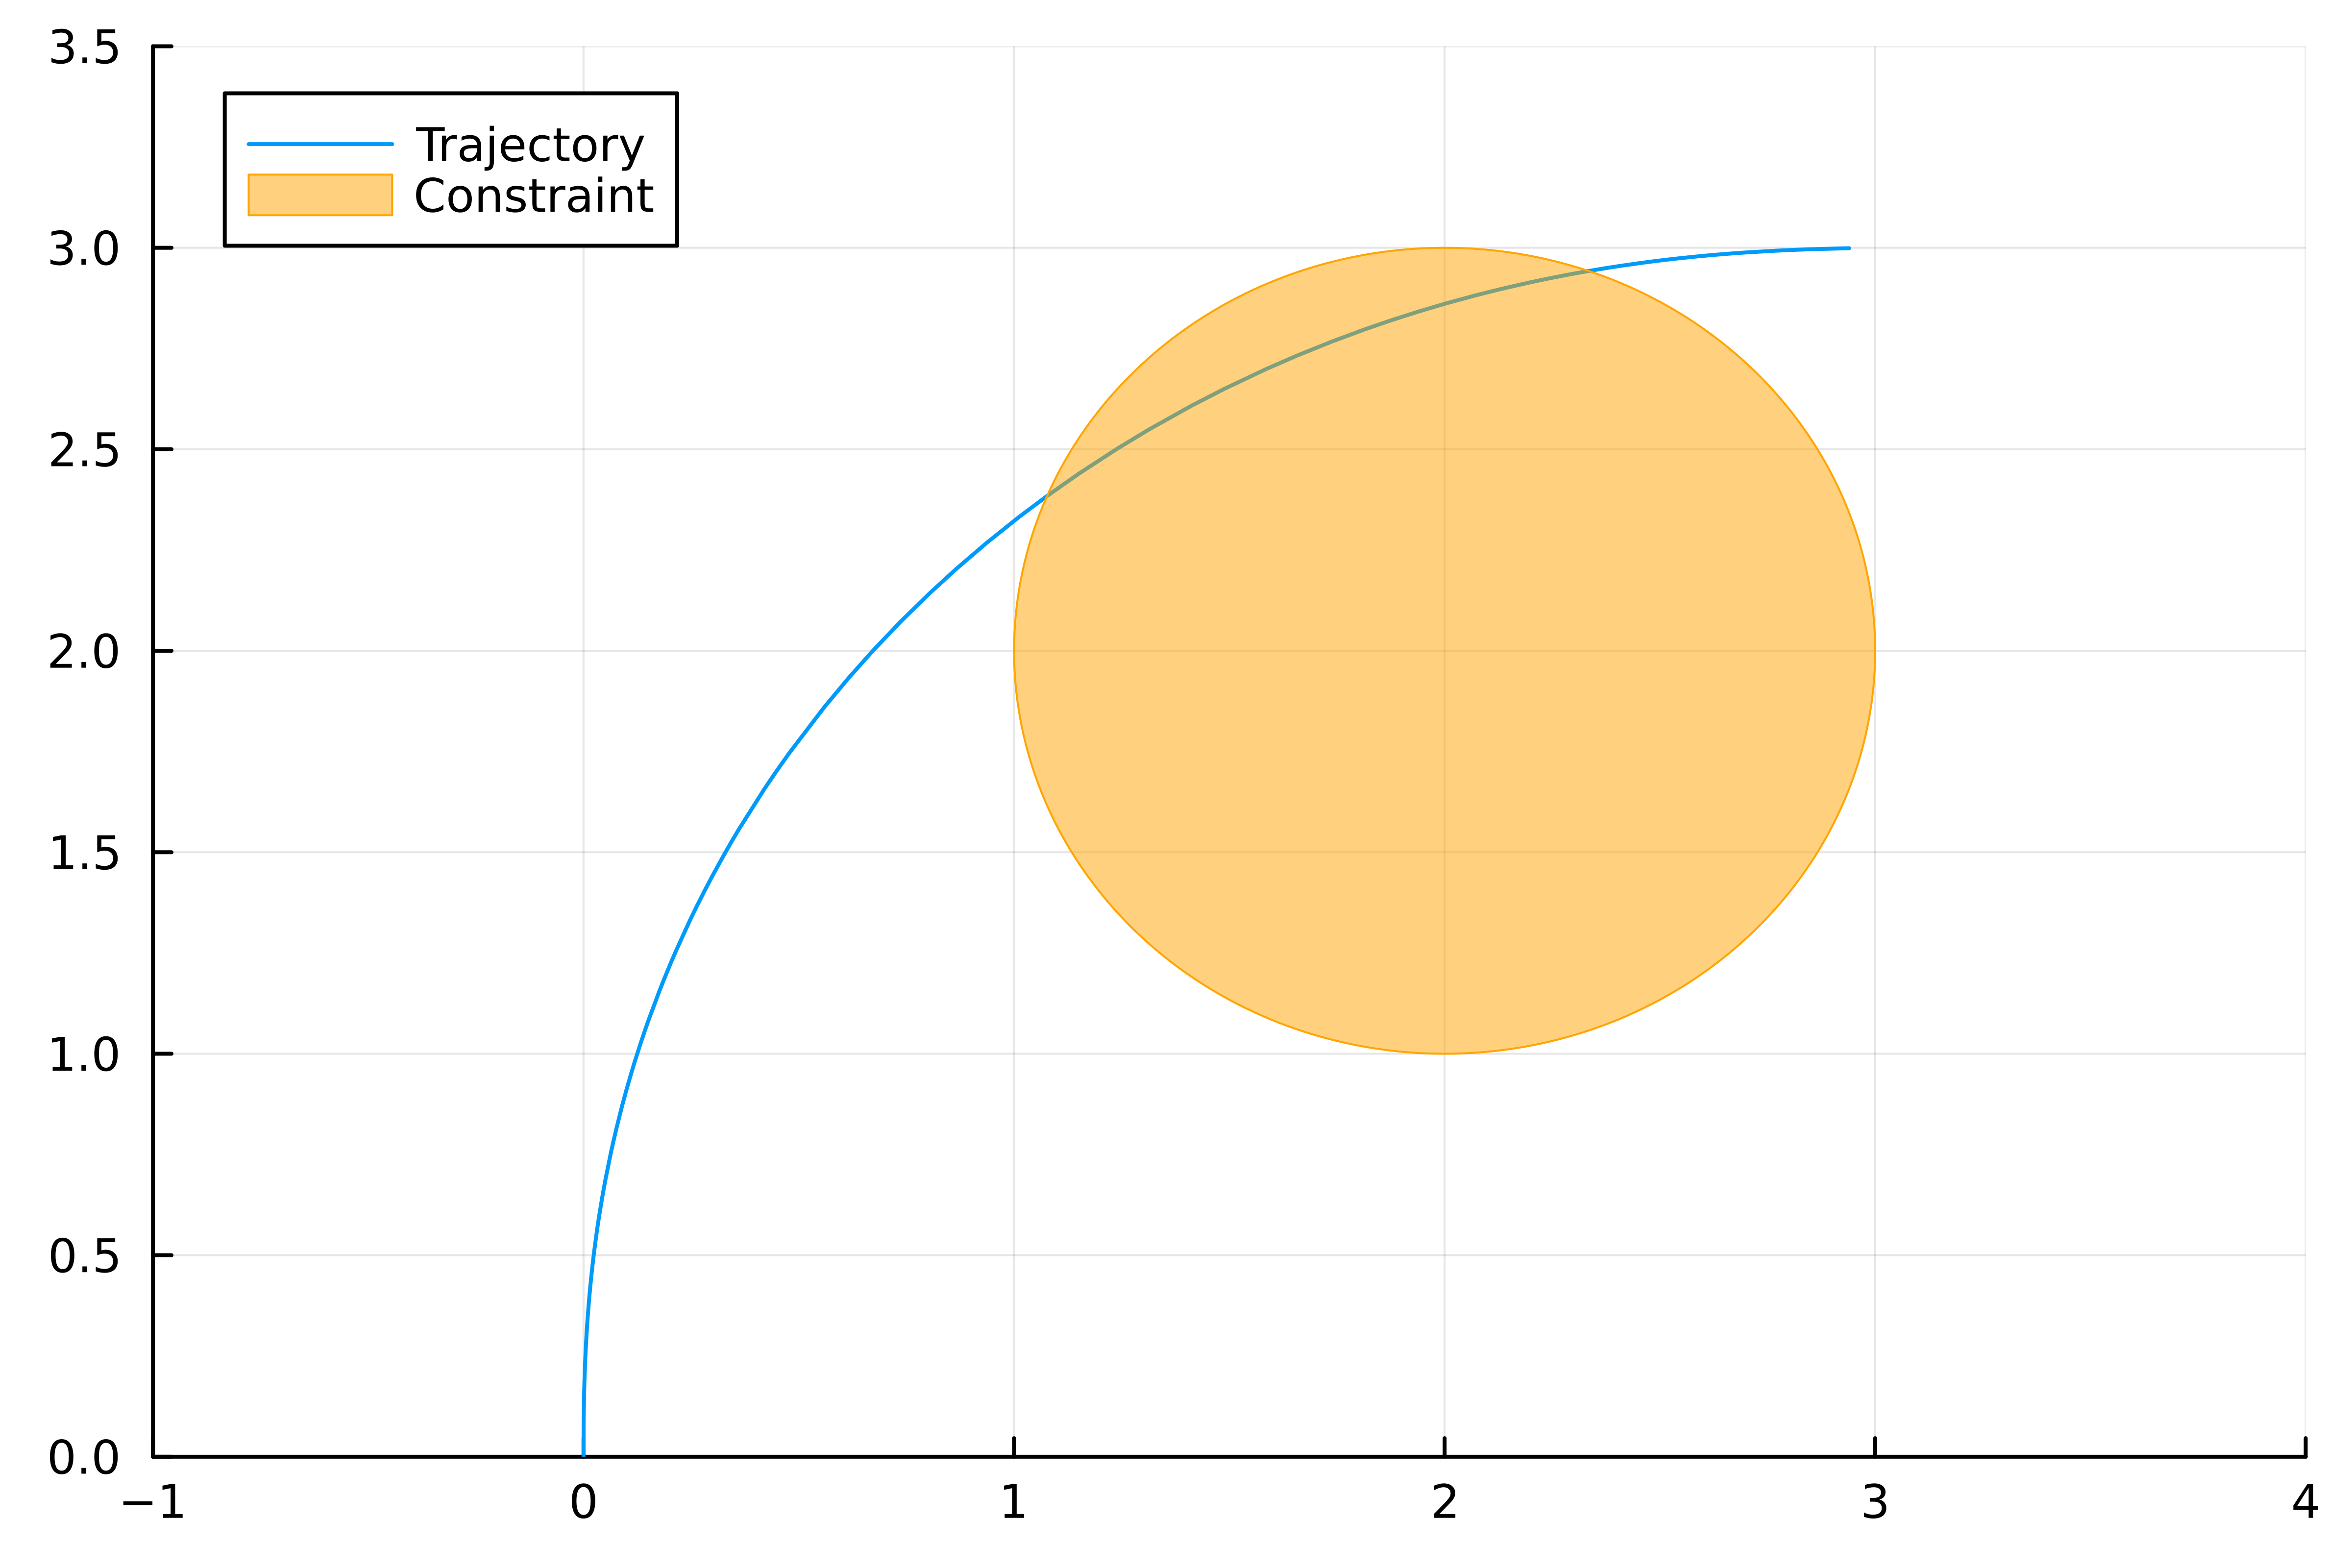

In [21]:
function circleShape(x, y, r)
    θ = LinRange(0, 2*pi, 500)
    x .+ r .* cos.(θ), y .+ r .* sin.(θ)
end


plot(X[1,:],X[2,:],label="Trajectory")
plot!(xlims=(-1,4),ylims=(0,3.5),label="Goal")
plot!(circleShape(2,2,1),label="Constraint", seriestype=:shape, lw=0.5,
    c=:orange, linecolor=:orange, fillalpha=0.5, fillcolor=:orange)

In [22]:
X_ilqr[:,end]

4-element Vector{Float64}:
 2.9396607001982975
 2.998837501442694
 1.5482125870051735
 0.10870313824800323

In [44]:
true && true

true

In [5]:
x_final = [2; 4; pi/2; 0.0]
prob = DDPProblem(model, tf, tN, dt, x_dim, u_dim, ell_cost, phi_cost, model.f!, x_init, x_final, nothing);
sol = solve_ddp(prob, max_ite=30, reg_param1=0., reg_param2=0.)
X0, U0, J, gains = sol.X, sol.U, sol.J, sol.gains;


UndefVarError: UndefVarError: model not defined

In [6]:
x_final = [3; 3; pi/2; 0.0]
prob = DDPProblem(model, tf, tN, dt, x_dim, u_dim, ell_cost, phi_cost, model.f!, x_init, x_final, nothing);
sol = solve_ddp(prob, X=X0, U=U0, max_ite=30, reg_param1=0., reg_param2=0.)
X, U, J, gains = sol.X, sol.U, sol.J, sol.gains;

UndefVarError: UndefVarError: model not defined

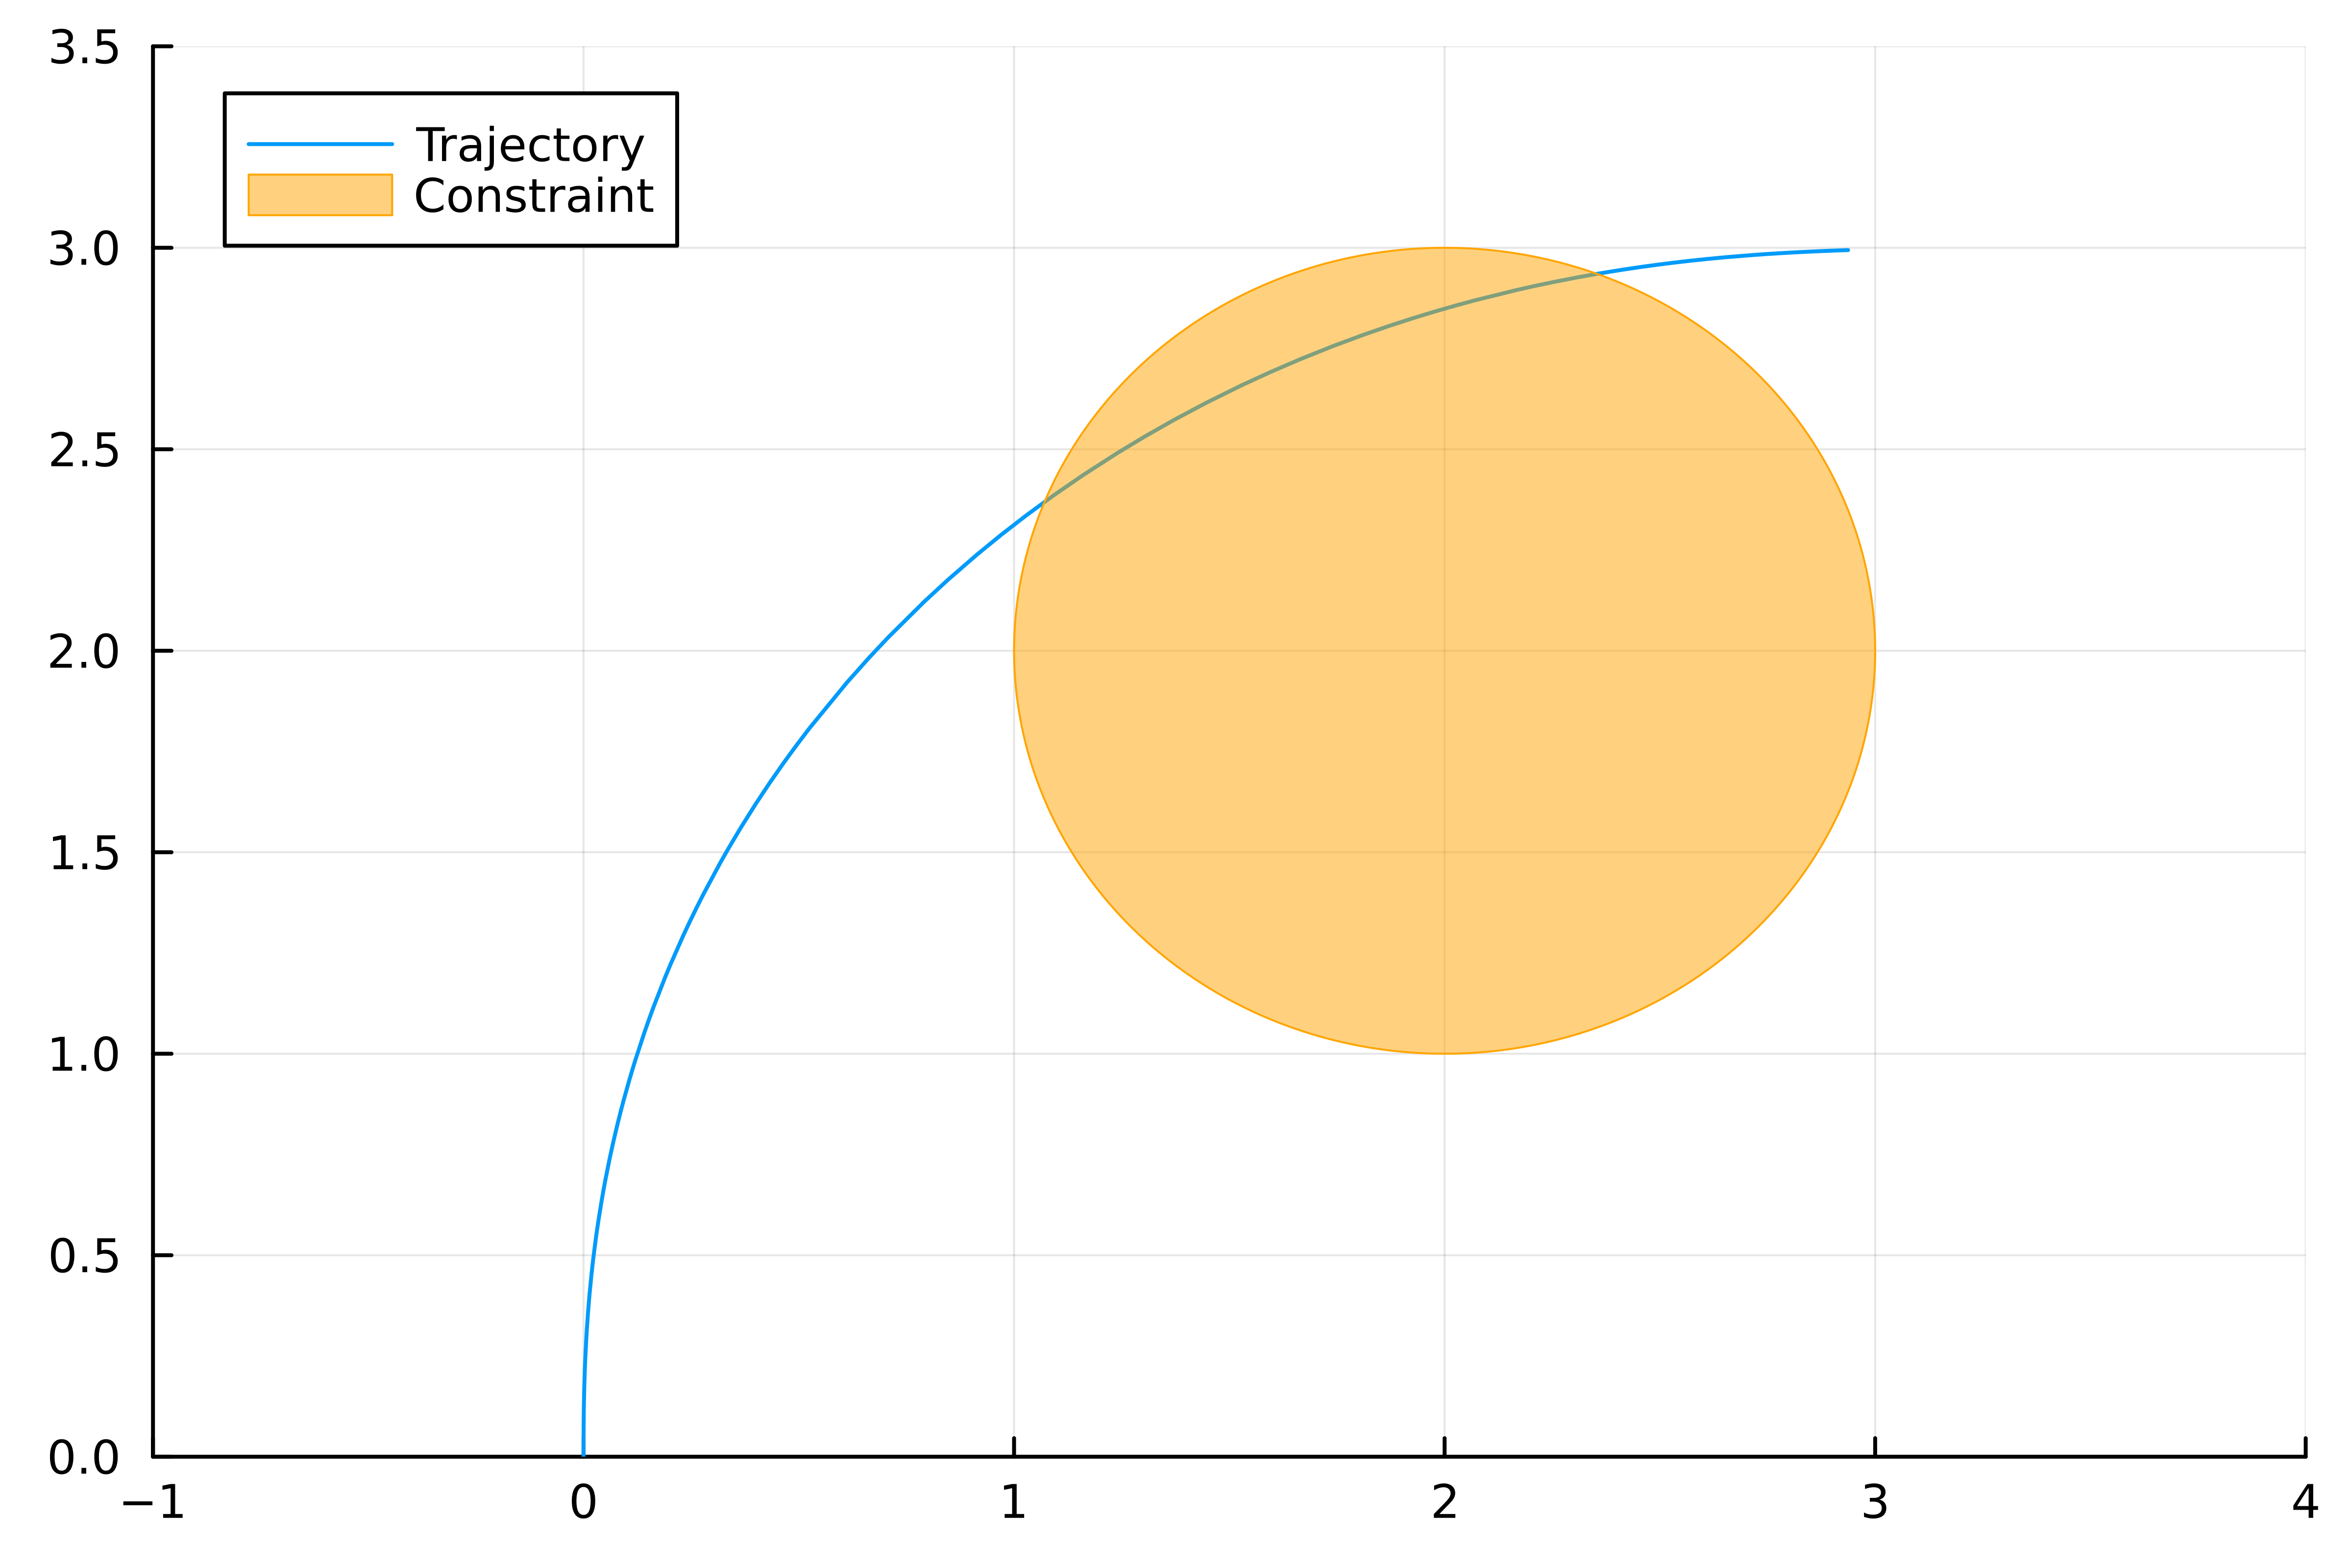

In [61]:
function circleShape(x, y, r)
    θ = LinRange(0, 2*pi, 500)
    x .+ r .* cos.(θ), y .+ r .* sin.(θ)
end


plot(X[1,:],X[2,:],label="Trajectory")
plot!(xlims=(-1,4),ylims=(0,3.5),label="Goal")
plot!(circleShape(2,2,1),label="Constraint", seriestype=:shape, lw=0.5,
    c=:orange, linecolor=:orange, fillalpha=0.5, fillcolor=:orange)